In [47]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster

In [27]:
df = pd.read_csv('shopping-data.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Label Encoding

In [31]:
# Applying Label Encoding to "Genre"
stringCol = df.iloc[:,1]
encoder = LabelEncoder()
encoder.fit(stringCol)
encoder.transform(stringCol)

# Replacing "Genre" values with Encoded Labels
df["Genre"].replace(to_replace=df["Genre"].tolist(), 
                      value=encoder.transform(stringCol),
                      inplace = True)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [32]:
# Making a crosstab and name the "count" column
df_outcome = pd.crosstab(index=df["Genre"], columns="count") 
df_outcome

col_0,count
Genre,
0,112
1,88


## Data Visualization

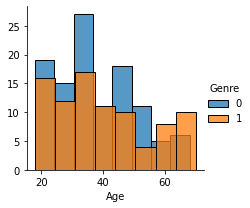

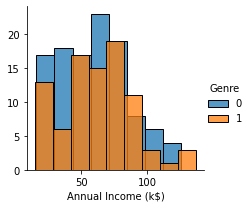

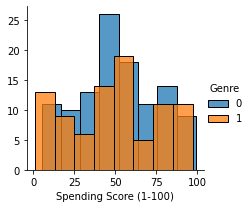

In [33]:
# Frequency distribution of "Genre"
sns.FacetGrid(df, hue="Genre", height=3).map(sns.histplot, "Age").add_legend()
sns.FacetGrid(df, hue="Genre", height=3).map(sns.histplot, "Annual Income (k$)").add_legend()
sns.FacetGrid(df, hue="Genre", height=3).map(sns.histplot, "Spending Score (1-100)").add_legend()
plt.show()

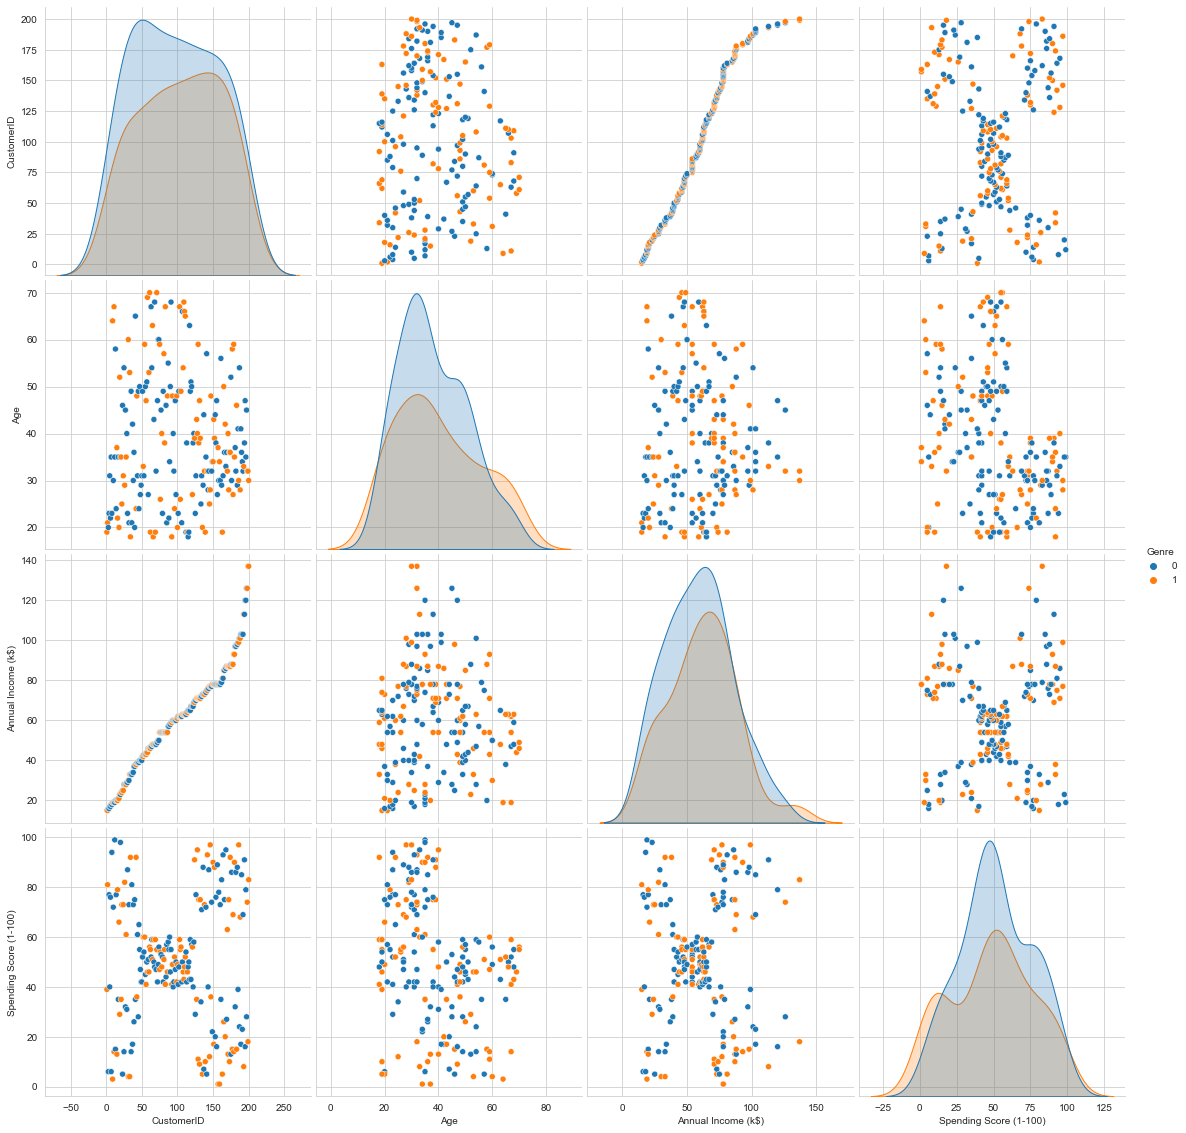

In [35]:
# Scatter plot of features according to "Genre"
sns.set_style("whitegrid")
sns.pairplot(df, hue="Genre", height=4);
plt.show()

## Drawing the dendogram

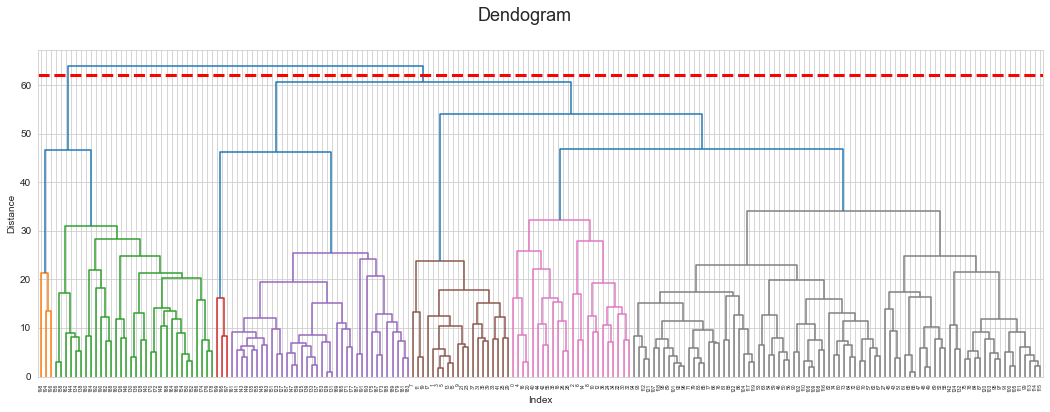

In [41]:
X = df.loc[:,["Age","Annual Income (k$)","Spending Score (1-100)"]]

# Trying different types of linkage method
dist_sin = linkage(X, method="average")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendogram",fontsize=18)

# Adding a horizontal line at the given distance
plt.axhline(y=62, c='red', lw=3, linestyle='dashed')

plt.show()

In [44]:
# Applying the hierarchical clustering algorithm with 3 clusters
hac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
hac.fit_predict(X)
hac.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

## Plotting the clusters

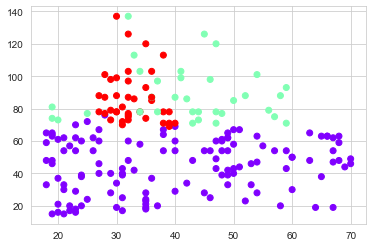

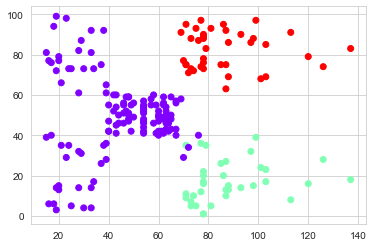

In [46]:
#Plot Age, Annual Income (k$) and Spending Score (1-100)
data = X.iloc[:, 0:2].values
plt.scatter(data[:,0], data[:,1], c=hac.labels_, cmap='rainbow')
plt.show()

data = X.iloc[:, 1:3].values
plt.scatter(data[:,0], data[:,1], c=hac.labels_, cmap='rainbow')
plt.show()

## HAC Evaluation

In [48]:
# Adding hierarchical clustering result to data set
sh_hac = df.copy()

# fcluster : forms flat clusters from the hierarchical clustering defined by the given linkage matrix
sh_hac['K=2'] = fcluster(dist_sin, 2, criterion='maxclust')
sh_hac['K=3'] = fcluster(dist_sin, 3, criterion='maxclust')
sh_hac.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),K=2,K=3
0,1,1,19,15,39,2,3
1,2,1,21,15,81,2,3
2,3,0,20,16,6,2,3
3,4,0,23,16,77,2,3
4,5,0,31,17,40,2,3


<AxesSubplot:title={'center':'Genre'}, xlabel='Age', ylabel='Spending Score (1-100)'>

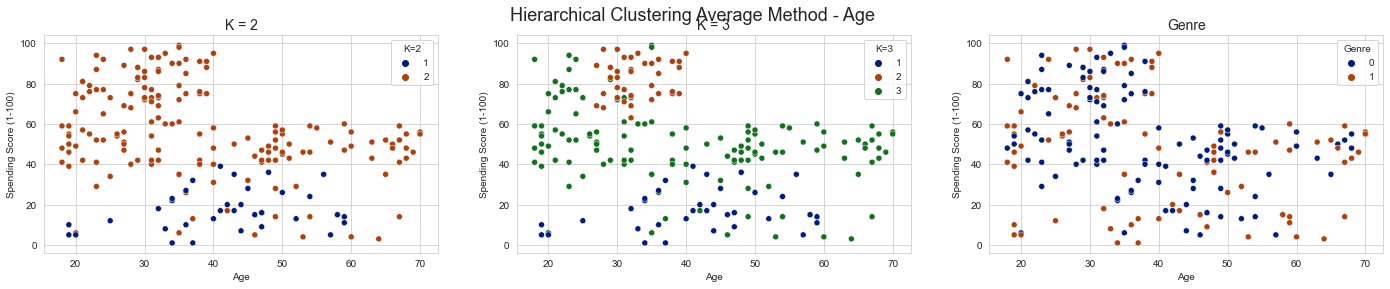

In [49]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Average Method - Age",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Age",y="Spending Score (1-100)", data=sh_hac, hue="K=2", palette='dark')

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="Age",y="Spending Score (1-100)", data=sh_hac, hue="K=3", palette='dark')

plt.subplot(1,3,3)
plt.title("Genre",fontsize=14)
sns.scatterplot(x="Age",y="Spending Score (1-100)", data=sh_hac, hue="Genre", palette='dark')